(28, 28) ()
train data
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

'\n#plot_model(model=model2, show_shapes=True)\nmae2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred2)).numpy()\nmse2 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred2)).numpy()\nprint(mae2, mse2)\npd.DataFrame(training_curve2.history).plot()\nplt.ylabel("loss")\nplt.xlabel("epochs")\n#plot_model(model=model3, show_shapes=True)\nmae3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred3)).numpy()\nmse3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred3)).numpy()\nprint(mae3, mse3)\npd.DataFrame(training_curve3.history).plot()\nplt.ylabel("loss")\nplt.xlabel("epochs")\n\n#step 5: Comparing the models\nmodel_results = [["model1",mae1,mse1],["model2",mae2,mse2],["model3",mae3,mse3]]\nall_results = pd.DataFrame(model_results,columns=["Model_name", "MAE","MSE"])\nprint(all_results)\n\n#step 6: Saving the models\n#Saving can be done in one of SavedModel format or in HDF5 format.\nmodel1.save("model1Saved.h5",save_format=\'HDF5\')\nmod

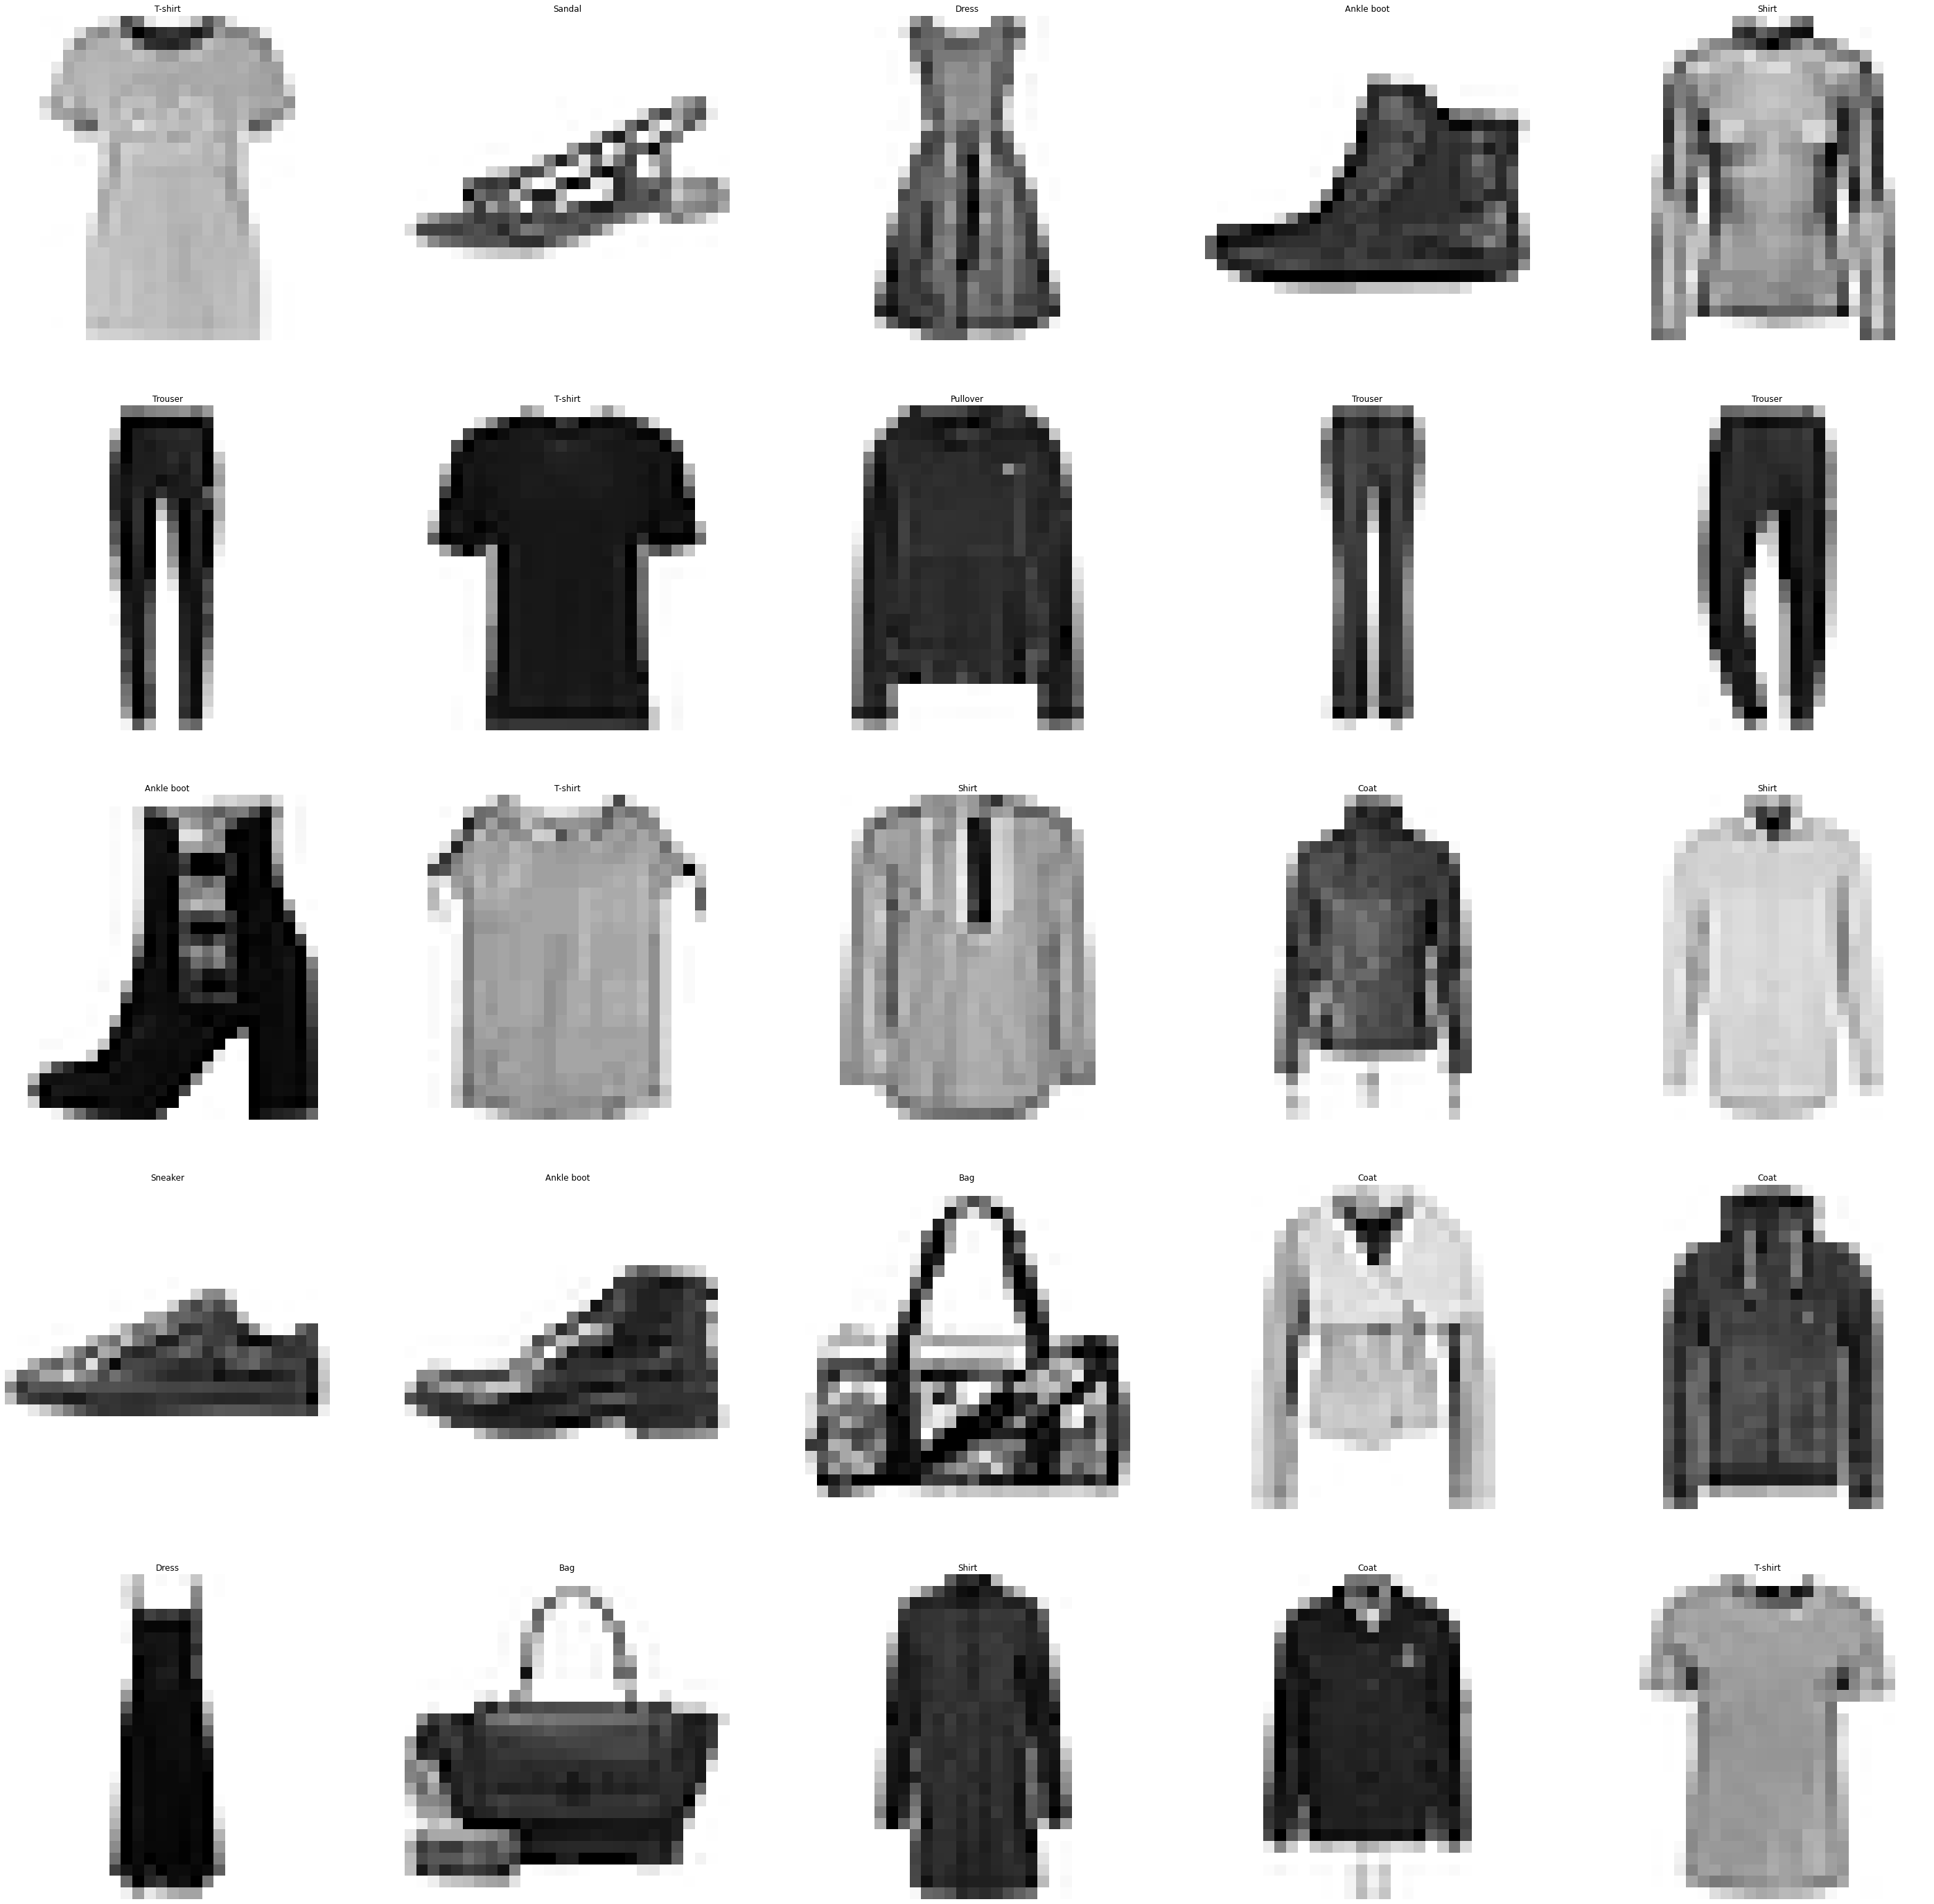

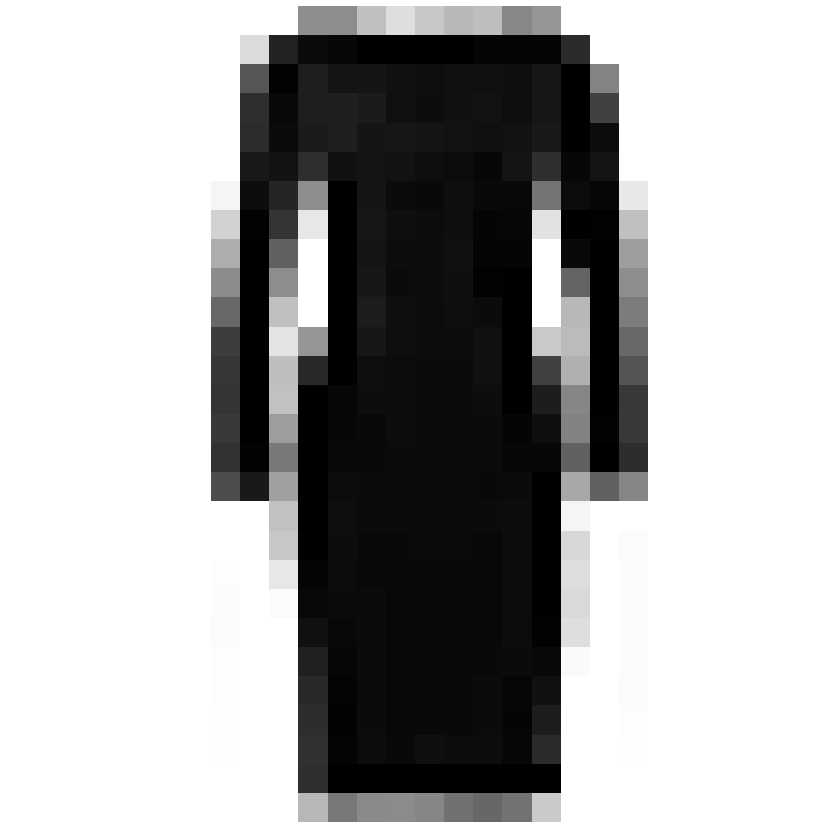

<Figure size 720x504 with 0 Axes>

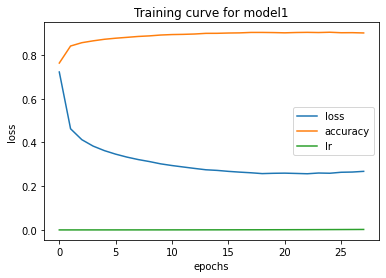

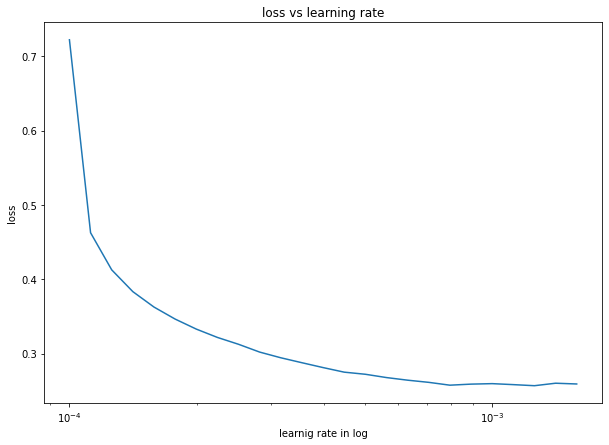

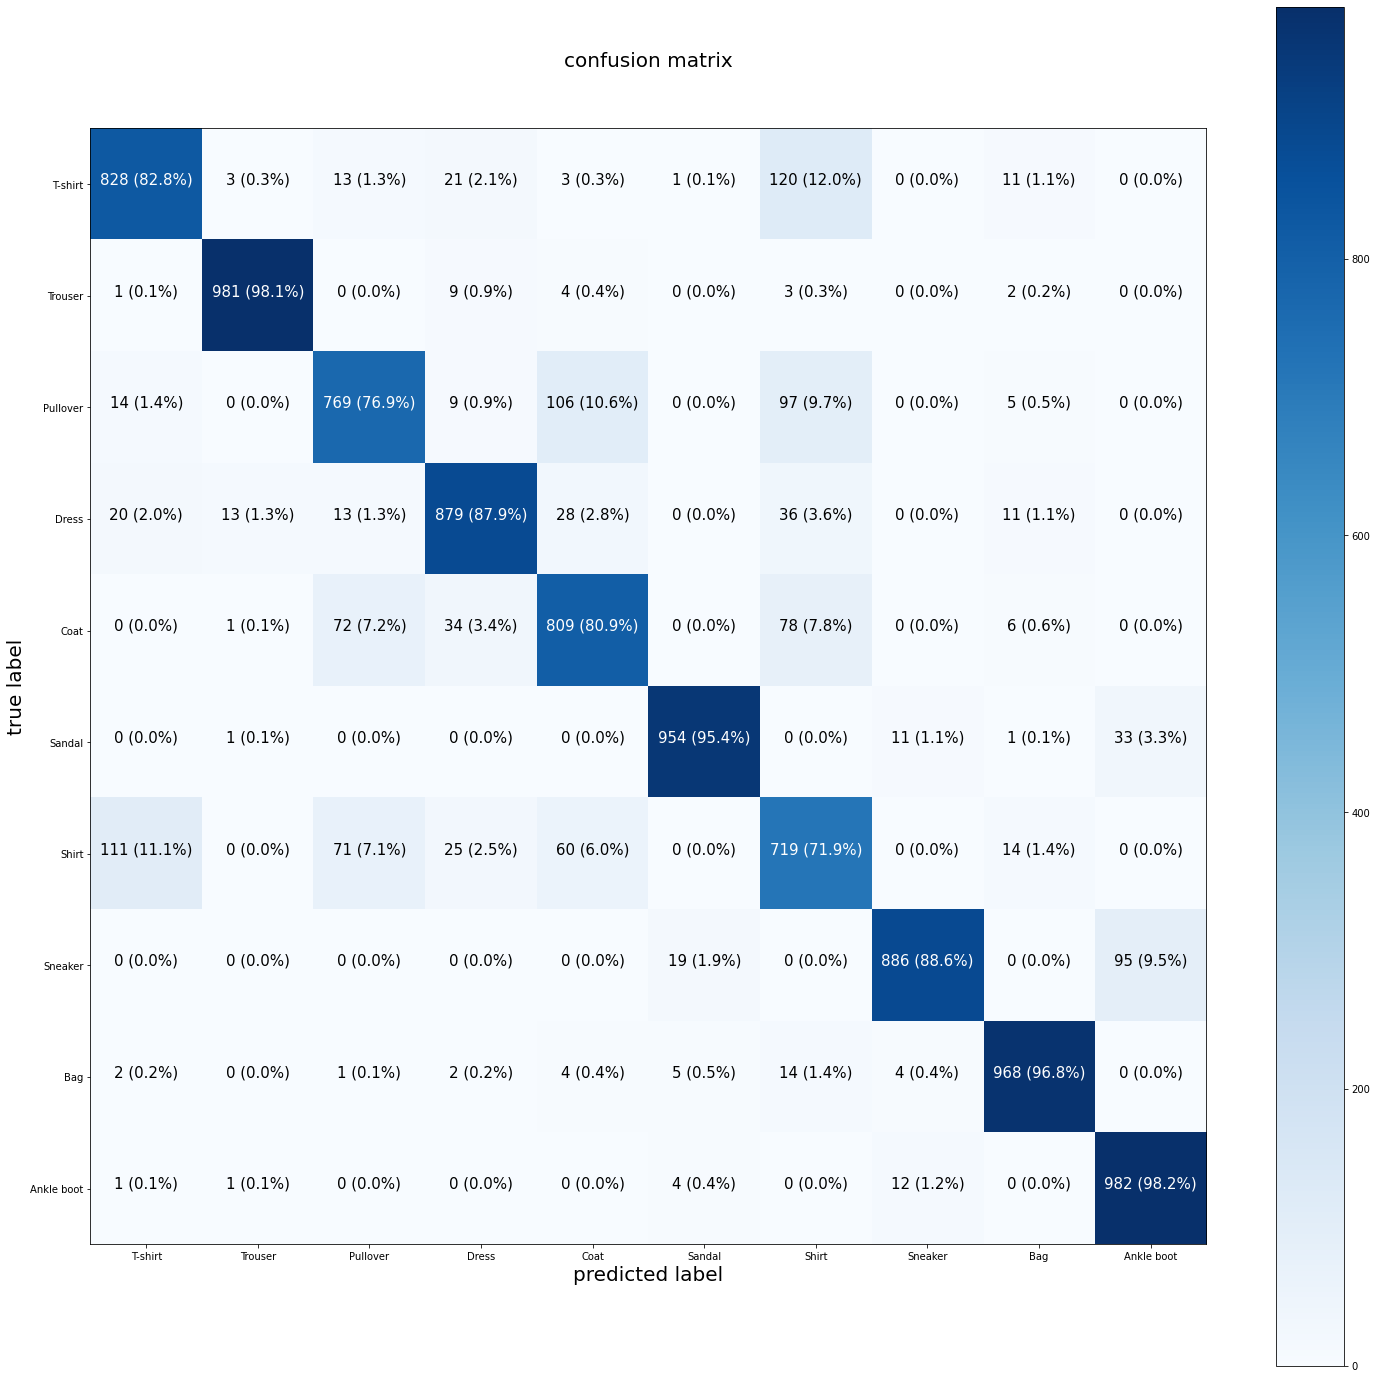

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.datasets import make_circles
import sklearn
import itertools
import random
from tensorflow.keras.datasets import fashion_mnist

def normalizeMinMax(x):
  return (x - x.min())/(x.max() - x.min())

def plotting_model(train_data=[],train_labels=[],test_data=[],test_labels=[],prediction1=[],prediction2=[],prediction3=[]):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training_data")
    plt.scatter(test_data, test_labels, c='r', label="Testing_data")
    plt.scatter(test_data, prediction1, c='g', label="Predicted_data_model1")
    plt.scatter(test_data, prediction2, c='y', label="Predicted_data_model2")
    plt.scatter(test_data, prediction3, c='c', label="Predicted_data_model3")

def plot_decision_boundary(model,X,y):
  """
  plots the decision boundary for a model classifying features (X) into classes
  """
  #define the axis boundaries of the meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  
  #create x value
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if y_pred[0] > 1:
    print("doing multiclass classfication")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c='r',s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

def pretty_confusion_matrix(y_test,y_pred,classes=None,textsize=20):
  
  cm = sklearn.metrics.confusion_matrix(y_test,tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize the confusion matrix
  n_classes = cm.shape[0] #number of classes

  #prettifying it.
  fig, ax = plt.subplots(figsize = (25,25))
  #create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  #Label the axes
  ax.set(title="confusion matrix",xlabel="predicted label",ylabel="true label",
         xticks=np.arange(n_classes),yticks=np.arange(n_classes),
         xticklabels = labels, yticklabels=labels)
  
  #set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label 
  ax.yaxis.label.set_size(textsize)
  ax.xaxis.label.set_size(textsize)
  ax.title.set_size(textsize)

  #set threshold for different colors
  threshold = (cm.max() + cm.min())/2.0

  #plot text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]>threshold else "black", size=15)

def plot_random_data(train_data,train_labels,class_names):
  plt.figure(figsize=(50,50))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.axis(False)

def test_random_data(test_data,test_labels,class_names,y_pred1):
    plt.figure(figsize=(15,15))
    index = random.choice(range(len(test_data)))
    plt.imshow(test_data[index],cmap=plt.cm.binary)
    print("true class: ",class_names[test_labels[index]]," predicted class: ",class_names[tf.argmax(y_pred1[index]).numpy()])
    plt.axis(False)


#step 0: setting up (Preprocessing - Turn data into tensors) the data
#n_samples = 1000
#Feature_matrix, label_matrix = make_circles(n_samples,noise=0.03,random_state=42)
#print(Feature_matrix, label_matrix)
#circles = pd.DataFrame({"X0":Feature_matrix[:,0],"X1":Feature_matrix[:,1],"y":label_matrix})
#plt.scatter(Feature_matrix[:,0],Feature_matrix[:,1],c='r')
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
print(train_data[0].shape,train_labels[0].shape)
#convert class names into human readable format
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plot_random_data(train_data,train_labels,class_names)

#Trick-Normalize data; but don't normalize the labels:if possible one-hot encode the labels
X_train,y_train,X_test,y_test = normalizeMinMax(train_data),train_labels,normalizeMinMax(test_data),test_labels
print("train data\n",X_train[0])
print("train labels \n",y_train[0], "\n")
#imported_data = pd.read_csv("/insurance.csv")
#print(imported_data)
#Create a column transformer to one-hot encode and Scale (Normalize) the imported data.
#column_transformer = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

#encoded_data = pd.get_dummies(imported_data) - Just oneHotEncode string data
#Feature_matrix = imported_data.drop("charges",axis=1)
#label_matrix = imported_data["charges"]
#print(Feature_matrix.head(),label_matrix.head())
#plt.figure(figsize=(10,7))
#Feature_matrix["age"].plot(kind="hist")
#plt.figure(figsize=(10,7))
#encoded_data["charges"].plot(kind="hist")
"""
#Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(Feature_matrix,label_matrix,test_size=0.2,random_state=42)
#print(X_train,"\n",X_test,"\n", y_train,"\n",y_test)
print(tf.shape(X_train))

#normalization(fit data into same scale) and Encoding of data
#fit the column tranformer to training and test data
column_transformer.fit(X_train)
column_transformer.fit(X_test)
#Transform
X_train_Normalized = column_transformer.transform(X_train)
X_test_Normalized = column_transformer.transform(X_test)
print(X_train_Normalized,"\n \n",X_test_Normalized)
"""
tf.random.set_seed(40)

#step 1: Creating the models- Define input layer, hidden layers and output layer
model1 = tf.keras.Sequential(name='neural_network1')
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))#Input flatten layer
model1.add(tf.keras.layers.Dense(100,activation='relu',name='Hidden_layer1')) #Hidden layer 1 with 500 neurons
model1.add(tf.keras.layers.Dense(50,activation='relu',name='Hidden_layer2')) #Hidden layer 2 with 50 neurons
model1.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer')) #output layer
"""
model2 = tf.keras.Sequential(name='neural_network2')
model2.add(tf.keras.layers.Dense(100, activation='relu',name='Hidden_layer1'))  # Hidden layer 1 with 100 neurons
model2.add(tf.keras.layers.Dense(100, activation='relu', name='Hidden_layer2'))  # Hidden layer 2 with 100 neurons
model2.add(tf.keras.layers.Dense(1, name='output_layer'))  # output layer

model3 = tf.keras.Sequential(name='neural_network3')
model3.add(tf.keras.layers.Dense(50,activation='relu',name='Hidden_layer1')) #Hidden layer 1 with 10 neurons
model3.add(tf.keras.layers.Dense(100,activation='relu',name='Hidden_layer2')) #Hidden layer 2 with 100 neurons
model3.add(tf.keras.layers.Dense(500,activation='relu',name='Hidden_layer3')) #Hidden layer 3 with 500 neurons
model3.add(tf.keras.layers.Dense(100, activation='relu', name='Hidden_layer4'))#Hidden layer 4 with 100 neurons
model3.add(tf.keras.layers.Dense(10, activation='relu', name='Hidden_layer5'))#Hidden layer 5 with 10 neurons
model3.add(tf.keras.layers.Dense(1,name='output_layer')) #output layer
"""
#step 2: Compiling the  - Define the loss function and optimizer for NNs
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
#model3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

#step 3: Fitting (Tranining) the models
#A callback works during model training.  
Earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience = 5)
learning_rate_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 **(epoch/20))#start with a low training rate and increase with number of epochs
training_curve1 = model1.fit(X_train,y_train,epochs=30,verbose=1,callbacks=[Earlystop_callback,learning_rate_scheduler_callback])
#training_curve2 = model2.fit(X_train_Normalized,y_train,epochs=500,verbose=0,callbacks=[Earlystop_callback,learning_rate_scheduler_callback])
#training_curve3 = model3.fit(X_train_Normalized, y_train,epochs=500,verbose=0callbacks=[Earlystop_callback,learning_rate_scheduler_callback])

#step 4: Evaluating the models
model1.summary()
#model2.summary()
#model3.summary()
y_pred1 = model1.predict(X_test)
#y_pred2 = model2.predict(X_test_Normalized)
#y_pred3 = model3.predict(X_test_Normalized)
model1.evaluate(X_test,y_test)
#model2.evaluate(X_test_Normalized,y_test)
#model3.evaluate(X_test_Normalized, y_test)

#plotting_model(X_train, y_train, X_test, y_test, y_pred1, y_pred2, y_pred3)
plot_model(model=model1, show_shapes=True)
#plot_decision_boundary(model1,X_test,y_test)
test_random_data(test_data,test_labels,class_names,y_pred1)
mae1 = tf.keras.metrics.mean_absolute_error(y_test,tf.argmax(y_pred1[0]).numpy())
mse1 = tf.keras.metrics.mean_squared_error(y_test,tf.argmax(y_pred1[0]).numpy())
print(mae1, mse1)
plt.figure(figsize=(10,7))
pd.DataFrame(training_curve1.history).plot()
plt.title("Training curve for model1")
plt.ylabel("loss")
plt.xlabel("epochs")

#plot the learning rate vs the loss to find the ideal learning rate for a given model
lrs = 1e-4 * 10 **((tf.range(25))/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,training_curve1.history["loss"][:25])
plt.xlabel("learnig rate in log")
plt.ylabel("loss")
plt.title("loss vs learning rate")

classification_report1 = sklearn.metrics.classification_report(y_test,tf.argmax(y_pred1,axis=1).numpy())
confusion_matrix1 = sklearn.metrics.confusion_matrix(y_test,tf.argmax(y_pred1,axis=1).numpy())
print(classification_report1)
print(confusion_matrix1)
pretty_confusion_matrix(y_test,tf.argmax(y_pred1,axis=1).numpy(),classes=class_names)

"""
#plot_model(model=model2, show_shapes=True)
mae2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred2)).numpy()
mse2 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred2)).numpy()
print(mae2, mse2)
pd.DataFrame(training_curve2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#plot_model(model=model3, show_shapes=True)
mae3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred3)).numpy()
mse3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred3)).numpy()
print(mae3, mse3)
pd.DataFrame(training_curve3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#step 5: Comparing the models
model_results = [["model1",mae1,mse1],["model2",mae2,mse2],["model3",mae3,mse3]]
all_results = pd.DataFrame(model_results,columns=["Model_name", "MAE","MSE"])
print(all_results)

#step 6: Saving the models
#Saving can be done in one of SavedModel format or in HDF5 format.
model1.save("model1Saved.h5",save_format='HDF5')
model2.save("model2Saved", save_format='SavedModel')
model3.save("model3Saved", save_format='SavedModel')

#loading model (optional)
loadmodel1 = tf.keras.models.load_model("model1Saved.h5",custom_objects={"mae": tf.keras.losses.mae})
loadmodel1.summary()
loadmodel_pred = loadmodel1.predict(X_test)
original_pred = model1.predict(X_test)
print(loadmodel_pred == original_pred)
"""



true class:  Bag  predicted class:  Bag


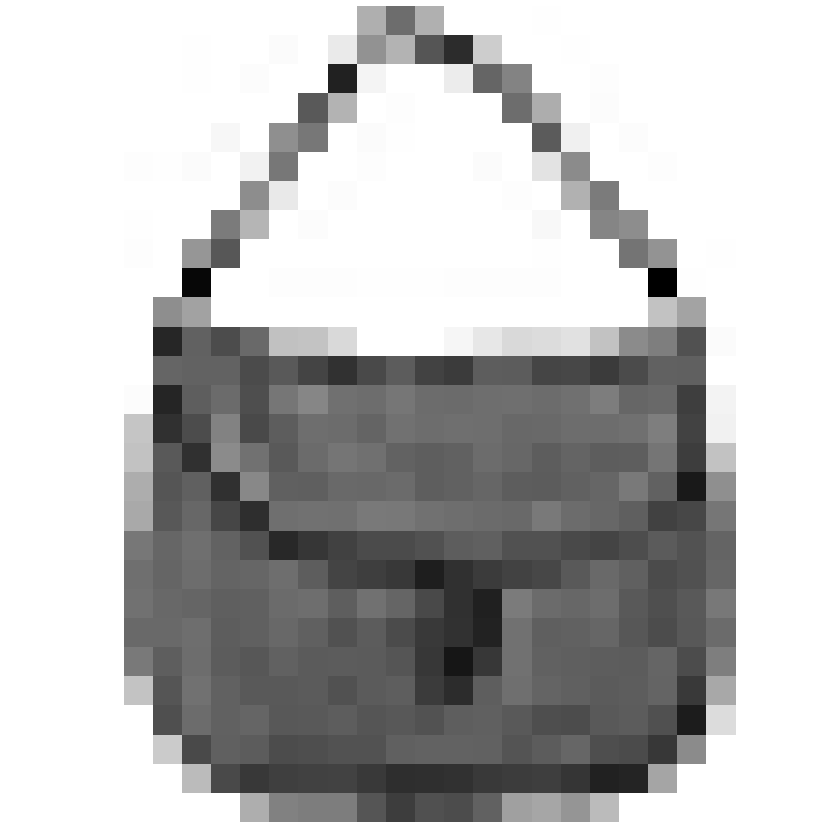

In [ ]:
test_random_data(test_data,test_labels,class_names,y_pred1)
#index = 5
#print("true class: ",class_names[test_labels[index]]," predicted class: ",class_names[tf.argmax(y_pred1[index]).numpy()])
